### Preprocessing Data

We will first begin by importing what we used for our EDA

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
import random
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Next, we will look at some of the variables we think would be useful for determining the winner of a League of Legends match. The variables we want to look at 

In [5]:
data = pd.read_csv("LeagueofLegends.csv")

In [6]:
data['wrdiff'] = pd.Series(data = None, dtype = float)

# Run for all rows in the data
for match in range(len(data)):
    # Check for blue champions
    color = 'blue'
    bluewrs = []
    # Run for each role
    for role in ['Top', 'Jungle', 'Middle', 'ADC', 'Support']:
        # Get the champion
        champ = data.at[match, color + role + 'Champ']
        # Get champion's average winrate
        bluechampgames = data[data['blue' + role + 'Champ'] == champ]
        redchampgames = data[data['red' + role + 'Champ'] == champ]
        bluewins = len(bluechampgames[bluechampgames['bResult'] == 1])
        redwins = len(redchampgames[redchampgames['rResult'] == 1])
        champwr = (bluewins+redwins) / (len(bluechampgames) + len(redchampgames))
        # Append champion's average winrate
        bluewrs.append(champwr)
    
    # Check for red champions
    color = 'red'
    redwrs = []
    for role in ['Top', 'Jungle', 'Middle', 'ADC', 'Support']:
        # Get the champion
        champ = data.at[match, color + role + 'Champ']
        # Get champion's average winrate
        bluechampgames = data[data['blue' + role + 'Champ'] == champ]
        redchampgames = data[data['red' + role + 'Champ'] == champ]
        bluewins = len(bluechampgames[bluechampgames['bResult'] == 1])
        redwins = len(redchampgames[redchampgames['rResult'] == 1])
        champwr = (bluewins+redwins) / (len(bluechampgames) + len(redchampgames))
        # Append champion's average winrate
        redwrs.append(champwr)
    
    # Append the subtracted team's averages
    data.at[match, 'wrdiff'] = np.mean(bluewrs) - np.mean(redwrs)

Accuracy: 0.5912073490813649


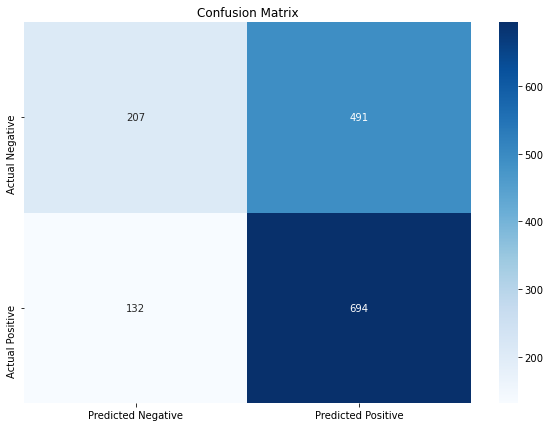

In [16]:
random.seed(43)
# features and target
X = data[['wrdiff']]
y = data['bResult']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print('Correlation: ' + str(data['bResult'].corr(data['wrdiff'])))
print(classification_report(y_test, y_pred))

Correlation: 0.21763879085538634
              precision    recall  f1-score   support

           0       0.61      0.30      0.40       698
           1       0.59      0.84      0.69       826

    accuracy                           0.59      1524
   macro avg       0.60      0.57      0.54      1524
weighted avg       0.60      0.59      0.56      1524



In [8]:
random.seed(12)
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5190288713910761


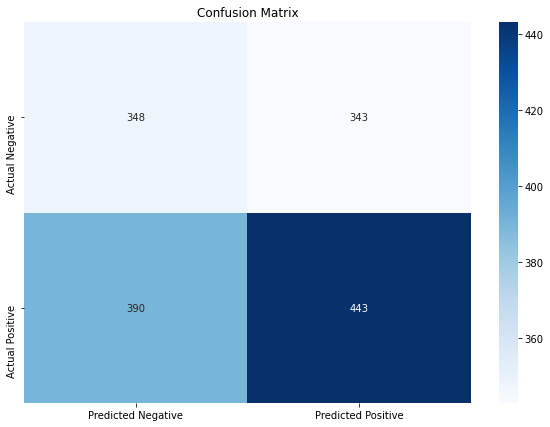

In [9]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print('Correlation: ' + str(data['bResult'].corr(data['wrdiff'])))
print(classification_report(y_test, y_pred))

Correlation: 0.21763879085538634
              precision    recall  f1-score   support

           0       0.47      0.50      0.49       691
           1       0.56      0.53      0.55       833

    accuracy                           0.52      1524
   macro avg       0.52      0.52      0.52      1524
weighted avg       0.52      0.52      0.52      1524

